In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
os.listdir('data')

['checkin_checkout_history_updated.csv',
 'gym_locations_data.csv',
 'subscription_plans.csv',
 'users_data.csv']

In [3]:
history=pd.read_csv('data/checkin_checkout_history_updated.csv')
location= pd.read_csv('data/gym_locations_data.csv')
subscription=pd.read_csv('data/subscription_plans.csv')
users=pd.read_csv('data/users_data.csv')


In [4]:
history.head()

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned
0,user_3291,gym_6,2023-09-10 15:55:00,2023-09-10 16:34:00,Weightlifting,462
1,user_1944,gym_2,2023-04-13 20:07:00,2023-04-13 22:43:00,Yoga,1278
2,user_958,gym_7,2023-06-10 12:24:00,2023-06-10 13:49:00,Cardio,858
3,user_811,gym_2,2023-05-23 17:11:00,2023-05-23 20:01:00,Yoga,1134
4,user_4923,gym_10,2023-02-21 06:20:00,2023-02-21 08:02:00,Weightlifting,1049


In [5]:
history.nunique()

user_id              5000
gym_id                 10
checkin_time       177713
checkout_time      183354
workout_type            6
calories_burned      1996
dtype: int64

In [6]:
location.nunique()

gym_id        10
location      10
gym_type       3
facilities    10
dtype: int64

In [7]:
location.head()

,gym_id,location,gym_type,facilities
0,gym_1,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court"
1,gym_2,Los Angeles,Budget,"Climbing Wall, Yoga Classes, Sauna"
2,gym_3,Chicago,Budget,"Sauna, Climbing Wall, Swimming Pool"
3,gym_4,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool"
4,gym_5,Phoenix,Standard,"Basketball Court, CrossFit, Swimming Pool"


In [8]:
users.nunique()

user_id              5000
first_name             12
last_name              12
age                    47
gender                  3
birthdate            4363
sign_up_date         1013
user_location          10
subscription_plan       3
dtype: int64

In [9]:
users.head()

,user_id,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan
0,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic
1,user_2,Michael,Miller,46,Non-binary,1978-12-22,2023-08-08,Orlando,Pro
2,user_3,Daniel,Smith,32,Female,1962-08-30,2021-01-11,Orlando,Basic
3,user_4,David,Smith,60,Male,2003-12-05,2023-08-07,Denver,Pro
4,user_5,Chris,Jones,25,Female,2004-08-25,2021-01-08,Denver,Basic


In [10]:
users[users.duplicated(subset=['first_name','last_name','birthdate','sign_up_date'])]

,user_id,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan


In [11]:
subscription.head()

,subscription_plan,price_per_month,features
0,Basic,19.99,"Access to basic gym facilities, Limited class ..."
1,Pro,49.99,"Access to all facilities, Unlimited class acce..."
2,Student,9.99,"Access to basic facilities, Limited class acce..."


In [12]:
subscription.nunique()

subscription_plan    3
price_per_month      3
features             3
dtype: int64

In [13]:
subscription.describe()

,price_per_month
count,3.000000
mean,26.656667
std,20.816660
min,9.990000
25%,14.990000
50%,19.990000
75%,34.990000
max,49.990000


In [14]:
subscription.describe(include='O')

,subscription_plan,features
count,3,3
unique,3,3
top,Basic,"Access to basic gym facilities, Limited class ..."
freq,1,1


In [15]:
subscription.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subscription_plan  3 non-null      object 
 1   price_per_month    3 non-null      float64
 2   features           3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 204.0+ bytes


In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            5000 non-null   object
 1   first_name         5000 non-null   object
 2   last_name          5000 non-null   object
 3   age                5000 non-null   int64 
 4   gender             5000 non-null   object
 5   birthdate          5000 non-null   object
 6   sign_up_date       5000 non-null   object
 7   user_location      5000 non-null   object
 8   subscription_plan  5000 non-null   object
dtypes: int64(1), object(8)
memory usage: 351.7+ KB


In [17]:
users['sign_up_date']= pd.to_datetime(users['sign_up_date'])

In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            5000 non-null   object        
 1   first_name         5000 non-null   object        
 2   last_name          5000 non-null   object        
 3   age                5000 non-null   int64         
 4   gender             5000 non-null   object        
 5   birthdate          5000 non-null   object        
 6   sign_up_date       5000 non-null   datetime64[ns]
 7   user_location      5000 non-null   object        
 8   subscription_plan  5000 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 351.7+ KB


In [19]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gym_id      10 non-null     object
 1   location    10 non-null     object
 2   gym_type    10 non-null     object
 3   facilities  10 non-null     object
dtypes: object(4)
memory usage: 452.0+ bytes


In [20]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   user_id          300000 non-null  object
 1   gym_id           300000 non-null  object
 2   checkin_time     300000 non-null  object
 3   checkout_time    300000 non-null  object
 4   workout_type     300000 non-null  object
 5   calories_burned  300000 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 13.7+ MB


In [21]:
history['checkin_time']=pd.to_datetime( history['checkin_time'] )
history['checkout_time']=pd.to_datetime(history['checkout_time'])

In [22]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   user_id          300000 non-null  object        
 1   gym_id           300000 non-null  object        
 2   checkin_time     300000 non-null  datetime64[ns]
 3   checkout_time    300000 non-null  datetime64[ns]
 4   workout_type     300000 non-null  object        
 5   calories_burned  300000 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 13.7+ MB


In [23]:
history.user_id.head(10)

0    user_3291
1    user_1944
2     user_958
3     user_811
4    user_4923
5    user_1534
6    user_4431
7     user_410
8      user_54
9    user_4797
Name: user_id, dtype: object

In [24]:
users.user_id.head(10)

0     user_1
1     user_2
2     user_3
3     user_4
4     user_5
5     user_6
6     user_7
7     user_8
8     user_9
9    user_10
Name: user_id, dtype: object

In [25]:
subscription.head()

,subscription_plan,price_per_month,features
0,Basic,19.99,"Access to basic gym facilities, Limited class ..."
1,Pro,49.99,"Access to all facilities, Unlimited class acce..."
2,Student,9.99,"Access to basic facilities, Limited class acce..."


In [26]:
users.shape

(5000, 9)

In [27]:
location.shape

(10, 4)

In [28]:
data= users.merge(subscription,left_on='subscription_plan',right_on='subscription_plan',how='left')
data= data.merge(history,left_on='user_id',right_on='user_id',how='left')
data= data.merge(location,left_on=['user_location','gym_id'],right_on=['location','gym_id'],how='left')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_id            300000 non-null  object        
 1   first_name         300000 non-null  object        
 2   last_name          300000 non-null  object        
 3   age                300000 non-null  int64         
 4   gender             300000 non-null  object        
 5   birthdate          300000 non-null  object        
 6   sign_up_date       300000 non-null  datetime64[ns]
 7   user_location      300000 non-null  object        
 8   subscription_plan  300000 non-null  object        
 9   price_per_month    300000 non-null  float64       
 10  features           300000 non-null  object        
 11  gym_id             300000 non-null  object        
 12  checkin_time       300000 non-null  datetime64[ns]
 13  checkout_time      300000 non-null  datetime

In [30]:
data=data.drop(columns=['location','gym_type','facilities'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_id            300000 non-null  object        
 1   first_name         300000 non-null  object        
 2   last_name          300000 non-null  object        
 3   age                300000 non-null  int64         
 4   gender             300000 non-null  object        
 5   birthdate          300000 non-null  object        
 6   sign_up_date       300000 non-null  datetime64[ns]
 7   user_location      300000 non-null  object        
 8   subscription_plan  300000 non-null  object        
 9   price_per_month    300000 non-null  float64       
 10  features           300000 non-null  object        
 11  gym_id             300000 non-null  object        
 12  checkin_time       300000 non-null  datetime64[ns]
 13  checkout_time      300000 non-null  datetime

In [31]:

data= data.drop(columns=['features','gym_id','price_per_month','birthdate'],axis=1)
data.head()

,user_id,first_name,last_name,age,gender,sign_up_date,user_location,subscription_plan,checkin_time,checkout_time,workout_type,calories_burned
0,user_1,Chris,Wilson,56,Female,2023-02-06,Denver,Basic,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468
1,user_1,Chris,Wilson,56,Female,2023-02-06,Denver,Basic,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344
2,user_1,Chris,Wilson,56,Female,2023-02-06,Denver,Basic,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347
3,user_1,Chris,Wilson,56,Female,2023-02-06,Denver,Basic,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649
4,user_1,Chris,Wilson,56,Female,2023-02-06,Denver,Basic,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136


In [32]:
from datetime import time

data['time spend']= data['checkout_time']-data['checkin_time']
def timespend(x):
    hours = x.components.hours
    minutes = x.components.minutes
    if hours > 0:
        return f'{hours}h {minutes}m'
    else:
        return f'{minutes}m'
    


def to_time_format(x):
    hours = x.components.hours
    minutes = x.components.minutes
    return time(hour=hours, minute=minutes)
    
data['time spend']= data['time spend'].apply(timespend)
data['time spend']= pd.to_timedelta(data['time spend'])
data['time spend']= data['time spend'].apply(to_time_format)
data.sample(9)

,user_id,first_name,last_name,age,gender,sign_up_date,user_location,subscription_plan,checkin_time,checkout_time,workout_type,calories_burned,time spend
223324,user_3721,David,Miller,31,Female,2021-01-28,Orlando,Pro,2023-01-15 06:47:00,2023-01-15 08:17:00,Yoga,1208,01:30:00
120982,user_2015,Jane,Smith,48,Male,2023-03-27,Detroit,Student,2023-04-10 16:29:00,2023-04-10 18:09:00,Swimming,508,01:40:00
11848,user_200,Linda,Miller,29,Female,2023-09-26,Seattle,Student,2023-04-18 12:45:00,2023-04-18 14:54:00,CrossFit,848,02:09:00
257932,user_4298,Linda,Brown,25,Male,2023-06-04,Seattle,Pro,2023-09-28 08:35:00,2023-09-28 10:12:00,Cardio,1960,01:37:00
180640,user_3011,Laura,Miller,51,Male,2023-06-27,Atlanta,Student,2023-10-07 17:54:00,2023-10-07 19:54:00,Yoga,504,02:00:00
201979,user_3366,Robert,Wilson,60,Male,2022-02-28,Austin,Pro,2023-08-12 10:32:00,2023-08-12 13:02:00,Cardio,567,02:30:00
153522,user_2557,Michael,Wilson,54,Female,2022-10-11,Seattle,Student,2023-01-13 16:02:00,2023-01-13 18:16:00,Cardio,1536,02:14:00
67840,user_1132,Sarah,Rodriguez,60,Male,2023-02-24,Detroit,Student,2023-04-15 17:03:00,2023-04-15 18:10:00,Swimming,1374,01:07:00
121792,user_2028,David,Johnson,22,Male,2022-07-10,San Francisco,Pro,2023-09-18 11:19:00,2023-09-18 14:09:00,CrossFit,1205,02:50:00


## Data Visualization

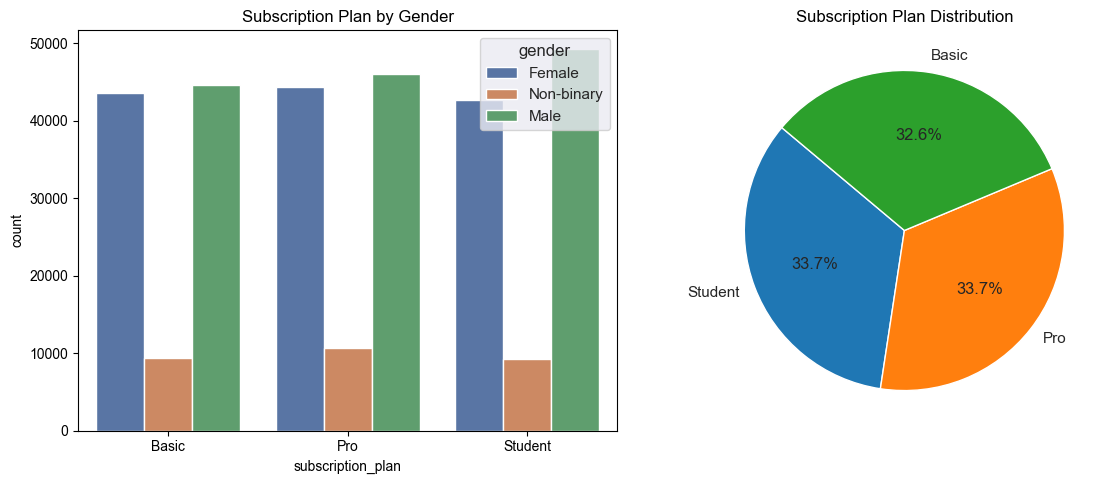

In [33]:
fig,axes=plt.subplots(1,2,figsize=(12,5))
sns.set_theme()
sns.countplot(x='subscription_plan', hue='gender', data=data, ax=axes[0])
axes[0].set_title('Subscription Plan by Gender')

subscription_counts = data['subscription_plan'].value_counts()
axes[1].pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Subscription Plan Distribution')

plt.tight_layout()
plt.show()

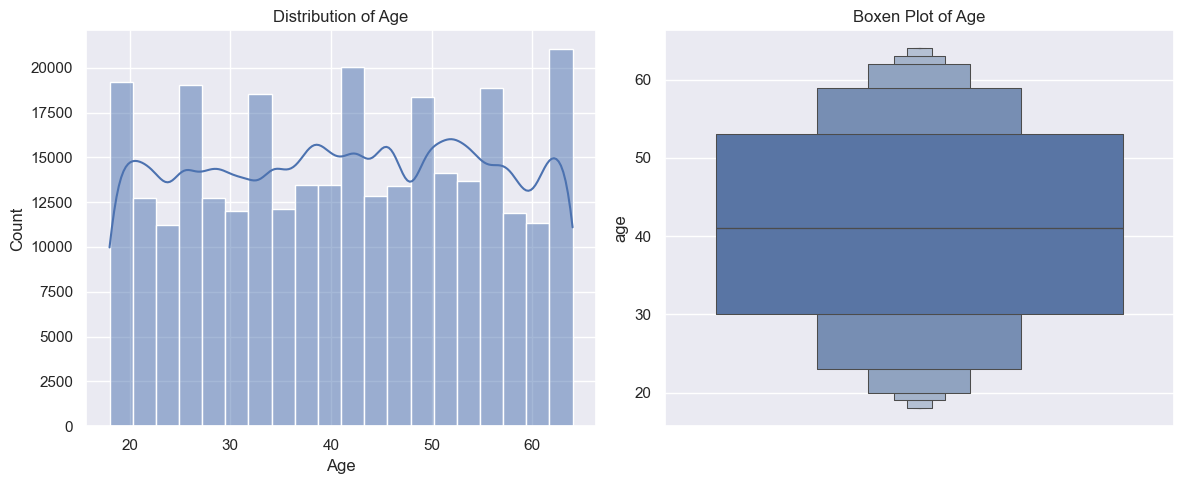

In [34]:
fig,axes=plt.subplots(1,2,figsize=(12,5))
sns.histplot(data['age'], kde=True, bins=20,ax=axes[0]) 
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

sns.boxenplot(data['age'],ax=axes[1])
axes[1].set_title('Boxen Plot of Age')

plt.tight_layout()
plt.show()

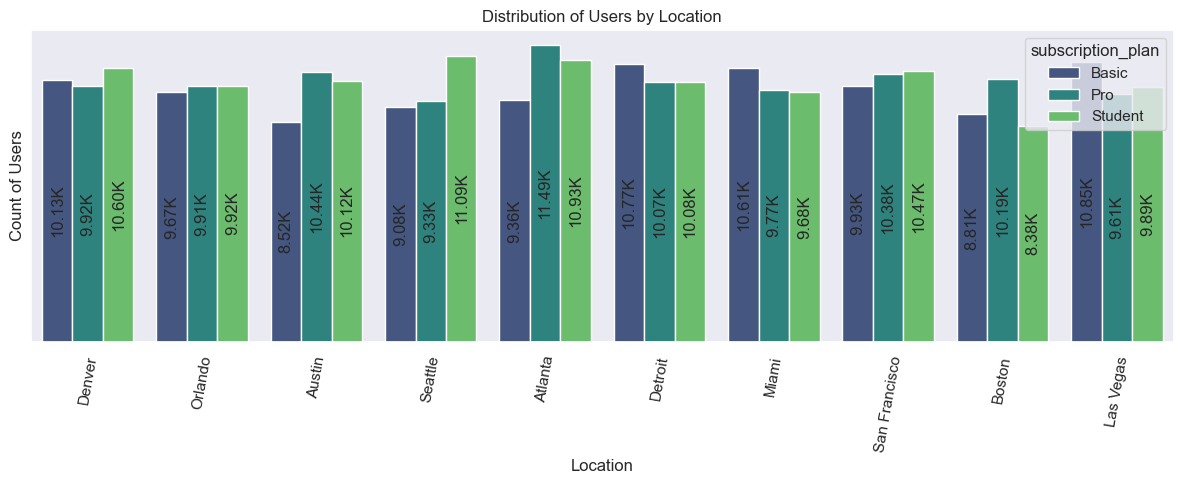

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for the plot
sns.set_theme()

plt.figure(figsize=(12, 5))
ax = sns.countplot(x='user_location', data=data, hue='subscription_plan', palette='viridis')

for container in ax.containers:
    labels = [f'{val/1000:.2f}K' for val in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', rotation=90)

ax.set_yticks([])

plt.title('Distribution of Users by Location')
plt.xlabel('Location')
plt.ylabel('Count of Users')

plt.xticks(rotation=80)

plt.tight_layout()
plt.show()




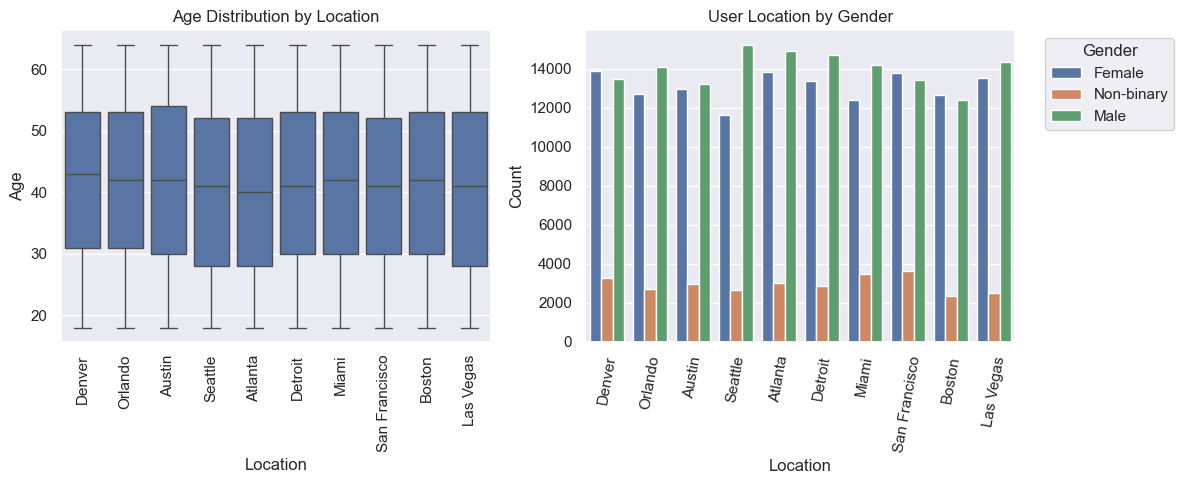

In [36]:
fig,axes=plt.subplots(1,2,figsize=(12,5))
sns.boxplot(x=data['user_location'], y=data['age'],ax=axes[0])
axes[0].set_title('Age Distribution by Location')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Age')
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(x=data['user_location'],hue=data['gender'],ax=axes[1])
axes[1].set_title('User Location by Gender')
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=80)
axes[1].legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

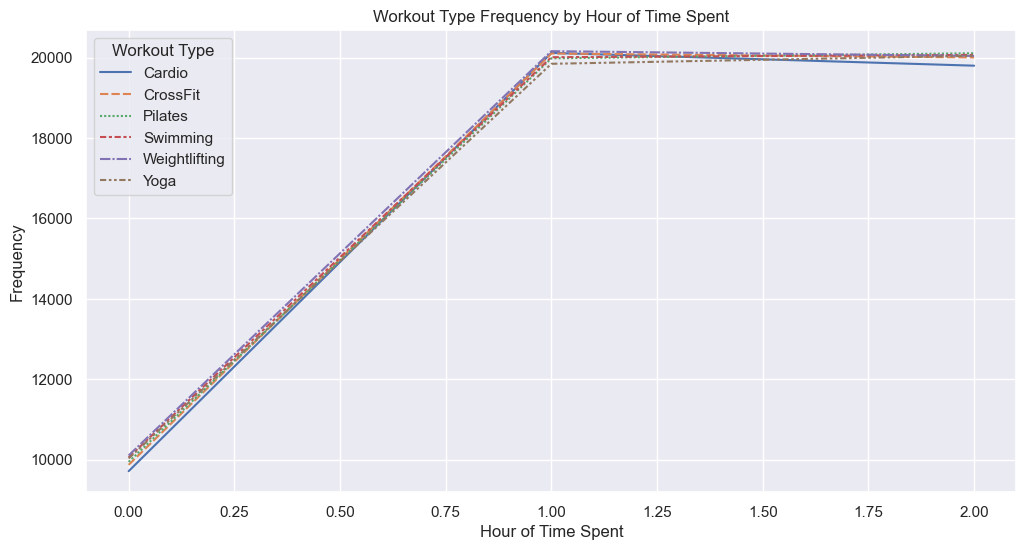

In [37]:
# Calculate time spent as a timedelta
data['time spend'] = data['checkout_time'] - data['checkin_time']
workout_by_hour = data.groupby(data['time spend'].dt.seconds // 3600)['workout_type'].value_counts().unstack()

workout_by_hour.index.name = 'Hour'

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=workout_by_hour)
plt.title('Workout Type Frequency by Hour of Time Spent')
plt.xlabel('Hour of Time Spent')
plt.ylabel('Frequency')
plt.legend(title='Workout Type')
plt.show()


In [38]:
data.head()

,user_id,first_name,last_name,age,gender,sign_up_date,user_location,subscription_plan,checkin_time,checkout_time,workout_type,calories_burned,time spend
0,user_1,Chris,Wilson,56,Female,2023-02-06,Denver,Basic,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468,0 days 02:14:00
1,user_1,Chris,Wilson,56,Female,2023-02-06,Denver,Basic,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344,0 days 02:02:00
2,user_1,Chris,Wilson,56,Female,2023-02-06,Denver,Basic,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347,0 days 01:42:00
3,user_1,Chris,Wilson,56,Female,2023-02-06,Denver,Basic,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649,0 days 02:16:00
4,user_1,Chris,Wilson,56,Female,2023-02-06,Denver,Basic,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136,0 days 01:52:00


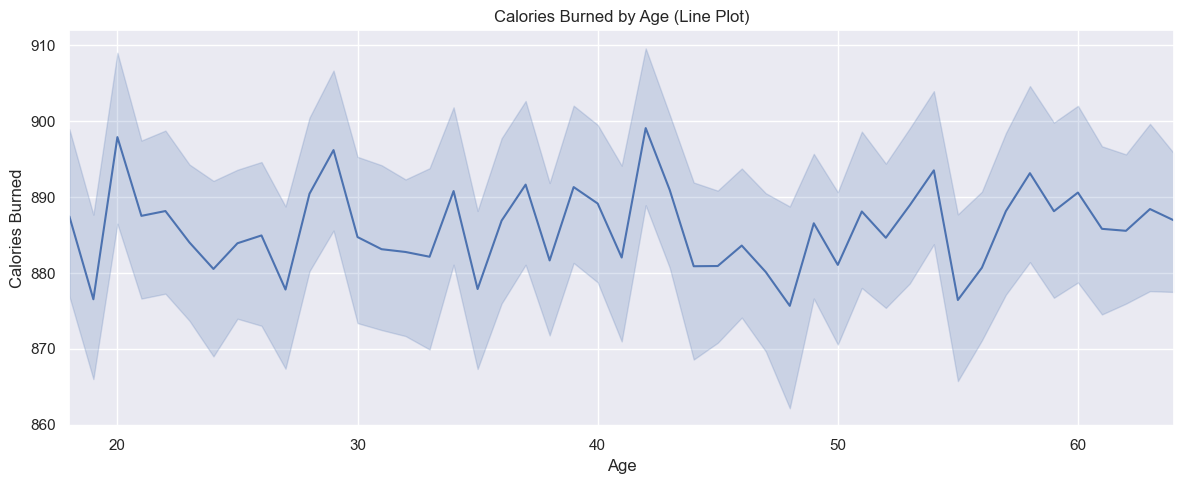

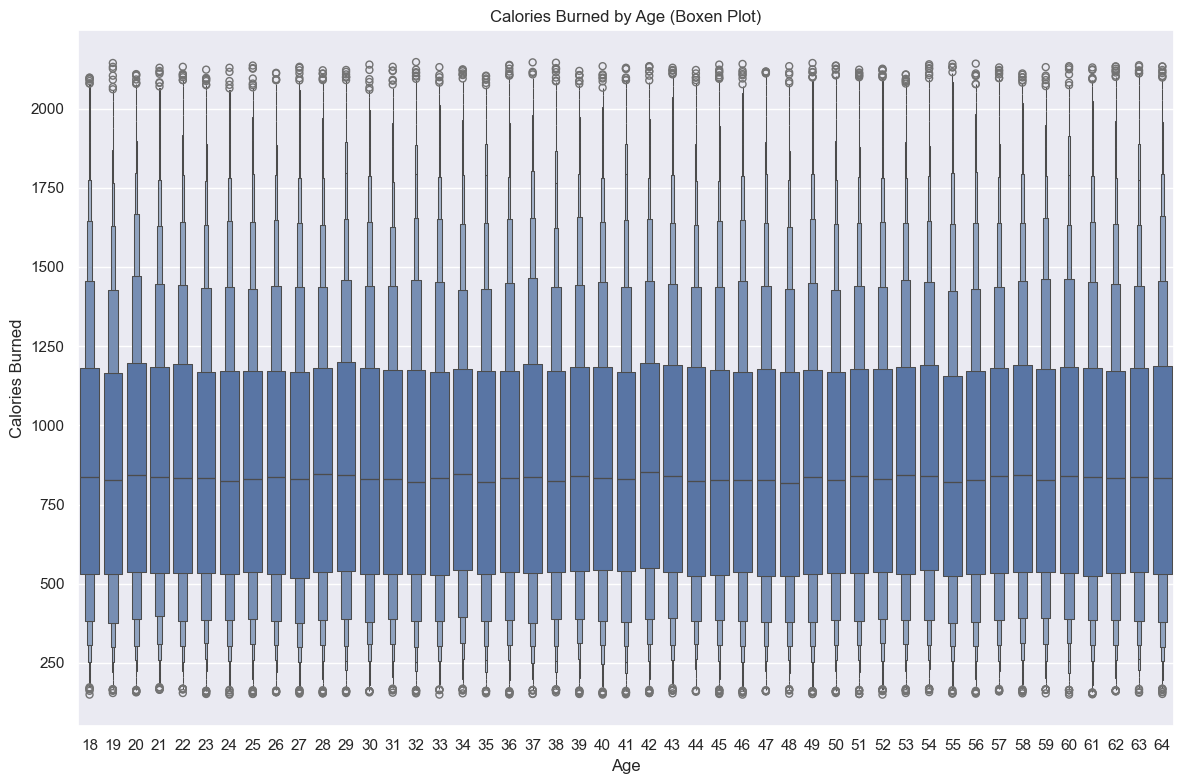

In [39]:
plt.figure(figsize=(12,5))
sns.lineplot(x=data['age'],y=data['calories_burned'])
plt.title('Calories Burned by Age (Line Plot)')
plt.xlabel('Age')
plt.ylabel('Calories Burned')
plt.xlim([ data['age'].min() , data['age'].max() ])

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,8))
sns.boxenplot(x=data['age'],y=data['calories_burned'])
plt.title('Calories Burned by Age (Boxen Plot)')
plt.xlabel('Age')
plt.ylabel('Calories Burned')

plt.tight_layout()
plt.show()

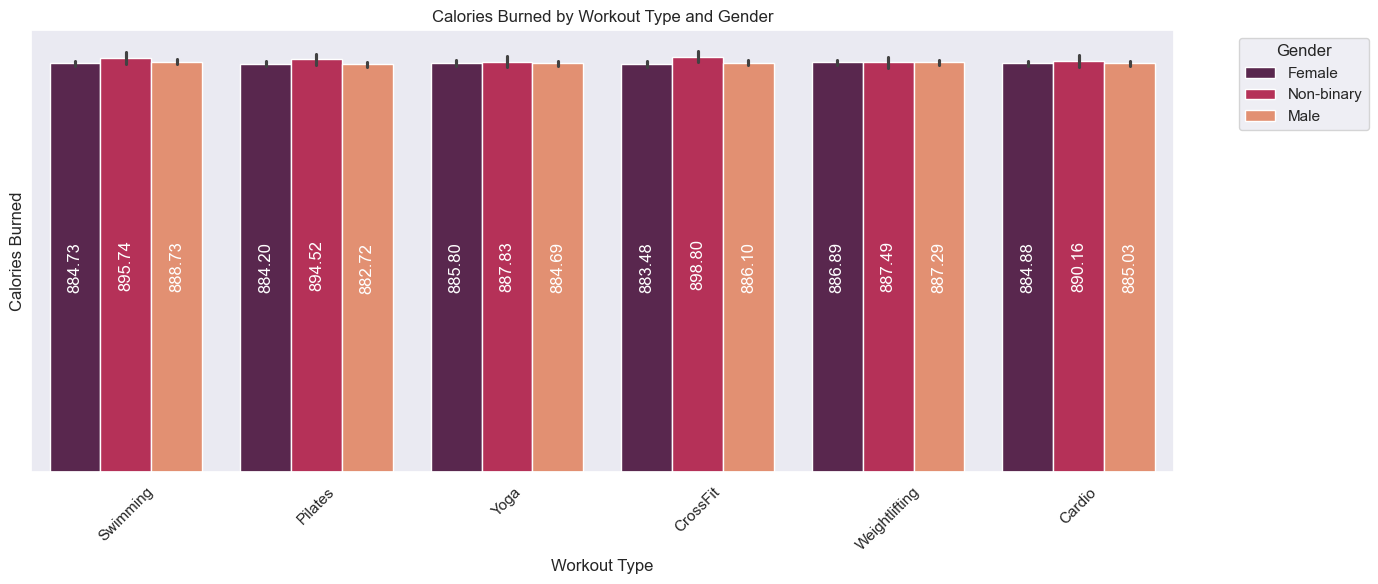

In [40]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(y=data['calories_burned'],x=data['workout_type'],hue=data['gender'],palette="rocket")
for container in ax.containers:
    label = [ f'{val:.2f}' for val in container.datavalues]
    ax.bar_label(container,labels=label,label_type='center',rotation=90,color='white')
plt.title('Calories Burned by Workout Type and Gender')
plt.xlabel('Workout Type')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45)
plt.yticks([])
plt.tight_layout()
plt.legend(title='Gender',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

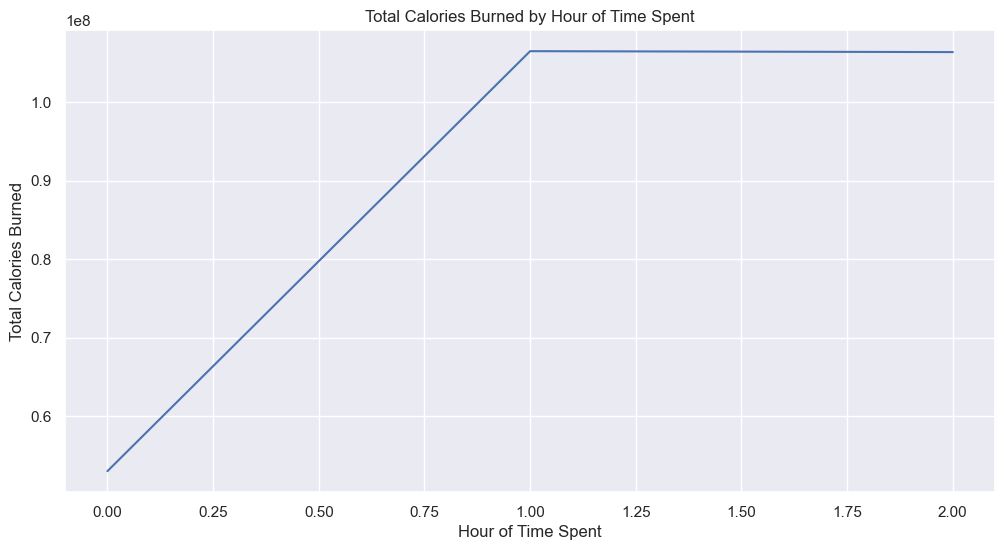

In [41]:
# Convert time spend to hours and group by it to get calories burned
calories_by_hours = data.groupby((data['time spend'].dt.seconds // 3600))['calories_burned'].sum()

calories_by_hours = calories_by_hours.reset_index()
calories_by_hours.columns = ['Hour of Time Spent', 'Total Calories Burned']

plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour of Time Spent', y='Total Calories Burned', data=calories_by_hours)
plt.title('Total Calories Burned by Hour of Time Spent')
plt.xlabel('Hour of Time Spent')
plt.ylabel('Total Calories Burned')
plt.show()



## Model Training

In [88]:
df= users.merge(subscription,left_on='subscription_plan',right_on='subscription_plan',how='left')
df= df.merge(history,left_on='user_id',right_on='user_id',how='left')
df= df.merge(location,left_on=['user_location','gym_id'],right_on=['location','gym_id'],how='left')

df=df.drop(['user_id','gym_id','first_name','last_name','birthdate','location','gym_type','facilities'],axis=1)

In [89]:
df['time_spend']= df['checkout_time']-df['checkin_time']
def timespend(x):
    hours = x.components.hours
    minutes = x.components.minutes
    if hours > 0:
        return f'{hours}h {minutes}m'
    else:
        return f'{minutes}m'
    
    
df['time_spend']= df['time_spend'].apply(timespend)

df['sign_up_date']=pd.to_datetime(df['sign_up_date'])

In [90]:
df['time_spend_hours']= df['checkout_time']-df['checkin_time']
df['time_spend_hours']= df['time_spend_hours'].dt.total_seconds() / 3600


In [91]:
from datetime import datetime
df['membership_duration']= datetime.now() - df['sign_up_date']
df['membership_duration_days'] = df['membership_duration'].dt.days

df['last_date']= datetime.now()


df=df.drop(['membership_duration'],axis=1)


In [92]:
df.sample(5)

,age,gender,sign_up_date,user_location,subscription_plan,price_per_month,features,checkin_time,checkout_time,workout_type,calories_burned,time_spend,time_spend_hours,membership_duration_days,last_date
87673,33,Male,2021-10-02,Las Vegas,Basic,19.99,"Access to basic gym facilities, Limited class ...",2023-06-26 20:13:00,2023-06-26 21:12:00,Yoga,620,59m,0.983333,1135,2024-11-10 09:27:23.732523
273268,45,Male,2021-09-27,Las Vegas,Basic,19.99,"Access to basic gym facilities, Limited class ...",2023-05-23 11:19:00,2023-05-23 14:13:00,Yoga,724,2h 54m,2.900000,1140,2024-11-10 09:27:23.732523
73385,46,Female,2022-12-07,Orlando,Pro,49.99,"Access to all facilities, Unlimited class acce...",2023-04-13 11:22:00,2023-04-13 13:55:00,Swimming,543,2h 33m,2.550000,704,2024-11-10 09:27:23.732523
183486,29,Male,2022-02-26,Orlando,Basic,19.99,"Access to basic gym facilities, Limited class ...",2023-08-07 17:10:00,2023-08-07 17:48:00,Swimming,783,38m,0.633333,988,2024-11-10 09:27:23.732523
244205,63,Female,2022-11-27,Denver,Student,9.99,"Access to basic facilities, Limited class acce...",2023-08-21 15:46:00,2023-08-21 17:44:00,Pilates,764,1h 58m,1.966667,714,2024-11-10 09:27:23.732523


In [93]:
df.shape

(300000, 15)

In [152]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [153]:
categorical_pipeline_Tf=Pipeline(
    steps=[
        ('TfidfVectorizer',TfidfVectorizer(max_features=50)),
    ]
)
categorical_pipeline_Onehot=Pipeline(
    steps=[
        ('OneHotEncoder',OneHotEncoder(drop='first')),
    ]
)


numerical_pipeline=Pipeline(
    steps=[
        ('StandardScaler',MinMaxScaler()),
    ]
)


In [154]:
import os
import joblib
scaler=StandardScaler()

numerical_columns=['age','time_spend_hours','membership_duration_days']

categorical_columns_Onehot=['gender', 'user_location', 'subscription_plan','workout_type']

categorical_columns_Tf='features'


target=scaler.fit_transform(df['calories_burned'].values.reshape(-1, 1))

preprocessing_path='artifact/preprocess_obj/preprocess.pkl'
preprocessing= ColumnTransformer(
    [
    ('numerical_pipeline',numerical_pipeline,numerical_columns),
    ('TfidfVectorizer_pipline',categorical_pipeline_Tf,categorical_columns_Tf),
    ('OneHotEncoder_pipeline',categorical_pipeline_Onehot,categorical_columns_Onehot)
    
    ]
)
preprocessing.fit(df)

os.makedirs(os.path.dirname(preprocessing_path),exist_ok=True)

joblib.dump(preprocessing,preprocessing_path)

['artifact/preprocess_obj/preprocess.pkl']

In [155]:

x_train,x_test,y_train,y_test=train_test_split(df.drop(['calories_burned'],axis=1),target,test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(240000, 14)
(60000, 14)
(240000, 1)
(60000, 1)


In [156]:
preprocessing_file=joblib.load(preprocessing_path)
x_train_preprocess=preprocessing_file.transform(x_train)
x_test_preprocess=preprocessing_file.transform(x_test)

print(x_train_preprocess.shape)
print(x_test_preprocess.shape)

(240000, 42)
(60000, 42)


In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoost
from sklearn.metrics import mean_squared_error,r2_score


models={
    'RandomForestRegressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'CatBoost':CatBoost(),
    'GradientBoostingRegressor':GradientBoostingRegressor()
}

def hyperparames(model_name,models,x_train,y_train):
    
    models_params = {
    'RandomForestRegressor': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 4],
        'bootstrap': [True, False],
        'random_state': [42]
    },
    'XGBRegressor': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05],
        'max_depth': [3, 6],
        'min_child_weight': [1, 3],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0.1, 0.2],
        'scale_pos_weight': [1, 2],
        'random_state': [42]
    },
    'CatBoost': {
        'iterations': [100, 200],
        'depth': [6, 8],
        'learning_rate': [0.01, 0.1],
        'l2_leaf_reg': [1, 3],
        'border_count': [32, 64],
        'random_seed': [42]
    },
    'GradientBoostingRegressor': {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7]
    }
}
    if model_name in models_params and model_name in models_params:

        model= models[model_name]
        params=models_params[model_name]

        gs=GridSearchCV(model,params,cv=3, scoring='r2', n_jobs=-1)
        gs.fit(x_train,y_train)
        return gs.best_estimator_, gs.best_params_
    else:
        print(f"Model {model_name} is not recognized.")
        return None, None



In [182]:
def evaluate(true,predict):
    r2=r2_score(true,predict)
    mse=mean_squared_error(true,predict)

    return r2,mse

In [183]:
def model_training(models, x_train, y_train, x_test, y_test):
    model_name_list = []
    r2_list = []
    mse_list = []

    # Iterate over models directly
    for model_name, model in models.items():
        
        model.fit(x_train, y_train)

        y_train_predict = model.predict(x_train)
        r2_train_score, mse_train_score = evaluate(y_train, y_train_predict)


        y_test_predict = model.predict(x_test)
        r2_test_score, mse_test_score = evaluate(y_test, y_test_predict)

        print(f'{model_name} ______________________________________________________________:')
        print('Train Scores:')
        print(f'Mean Squared Error: {mse_train_score}')
        print(f'R² Score: {r2_train_score}')
        print('-----' * 23)
        print('Test Scores:')
        print(f'Mean Squared Error: {mse_test_score}')
        print(f'R² Score: {r2_test_score}')

        model_name_list.append(model_name)
        r2_list.append(r2_train_score)
        mse_list.append(mse_train_score)

    results_df = pd.DataFrame({
        'Model': model_name_list,
        'R2_Score': r2_list,
        'MSE': mse_list
    })

    return results_df


In [172]:
result=model_training(models,x_train_preprocess,y_train,x_test_preprocess,y_test)

LinearRegression ______________________________________________________________:
Train Scores:
Mean Squared Error: 1.0003672353036193
R² Score: 6.90485554893927e-05
-------------------------------------------------------------------------------------------------------------------
Test Scores:
Mean Squared Error: 0.9982932896608611
R² Score: -5.984920518198322e-05


C:\Users\Topland.ma\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor ______________________________________________________________:
Train Scores:
Mean Squared Error: 0.1743543171040435
R² Score: 0.8257217229456841
-------------------------------------------------------------------------------------------------------------------
Test Scores:
Mean Squared Error: 1.1298711093889153
R² Score: -0.13187050637256315
XGBRegressor ______________________________________________________________:
Train Scores:
Mean Squared Error: 0.9562220517734175
R² Score: 0.04419497932495298
-------------------------------------------------------------------------------------------------------------------
Test Scores:
Mean Squared Error: 1.0099748076552868
R² Score: -0.011762038576766276
Learning rate set to 0.097331
0:	learn: 1.0001890	total: 104ms	remaining: 1m 43s
1:	learn: 1.0001664	total: 237ms	remaining: 1m 58s
2:	learn: 1.0001520	total: 303ms	remaining: 1m 40s
3:	learn: 1.0001363	total: 397ms	remaining: 1m 38s
4:	learn: 1.0001332	total: 516ms	remain

C:\Users\Topland.ma\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor ______________________________________________________________:
Train Scores:
Mean Squared Error: 0.9985421523183785
R² Score: 0.0018933355787874584
-------------------------------------------------------------------------------------------------------------------
Test Scores:
Mean Squared Error: 0.9987382801998328
R² Score: -0.0005056271903802756


In [173]:
result

,Model,R2_Score,MSE
0,LinearRegression,-0.000060,0.998293
1,RandomForestRegressor,-0.131871,1.129871
2,XGBRegressor,-0.011762,1.009975
3,CatBoost,-0.006956,1.005177
4,GradientBoostingRegressor,-0.000506,0.998738


In [184]:
def training(models, x_train, y_train, x_test, y_test):

    result = model_training(models, x_train, y_train, x_test, y_test)

    best_model_name = result['Model'].iloc[result['MSE'].idxmin()]
    
    best_model, best_params = hyperparames(best_model_name, models, x_train, y_train)
    
    print(f"Best Model after Hyperparameter Tuning: {best_model}")
    print(f"Best Parameters: {best_params}")

    return best_model, best_params,best_model_name,result


In [ ]:
models={
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'CatBoost':CatBoost(),
    'GradientBoostingRegressor':GradientBoostingRegressor()
}
best_model,good_parames,best_model_name,result=training(models,x_train_preprocess,y_train,x_test_preprocess,y_test)

LinearRegression ______________________________________________________________:
Train Scores:
Mean Squared Error: 1.0003672353036193
R² Score: 6.90485554893927e-05
-------------------------------------------------------------------------------------------------------------------
Test Scores:
Mean Squared Error: 0.9982932896608611
R² Score: -5.984920518198322e-05


C:\Users\Topland.ma\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor ______________________________________________________________:
Train Scores:
Mean Squared Error: 0.17464140811224063
R² Score: 0.8254347571446795
-------------------------------------------------------------------------------------------------------------------
Test Scores:
Mean Squared Error: 1.1284717907717132
R² Score: -0.130468711549536
XGBRegressor ______________________________________________________________:
Train Scores:
Mean Squared Error: 0.9562220517734175
R² Score: 0.04419497932495298
-------------------------------------------------------------------------------------------------------------------
Test Scores:
Mean Squared Error: 1.0099748076552868
R² Score: -0.011762038576766276
Learning rate set to 0.097331
0:	learn: 1.0001890	total: 88.7ms	remaining: 1m 28s
1:	learn: 1.0001664	total: 157ms	remaining: 1m 18s
2:	learn: 1.0001520	total: 228ms	remaining: 1m 15s
3:	learn: 1.0001363	total: 287ms	remaining: 1m 11s
4:	learn: 1.0001332	total: 336ms	remain

C:\Users\Topland.ma\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor ______________________________________________________________:
Train Scores:
Mean Squared Error: 0.9985421523183785
R² Score: 0.0018933355787874584
-------------------------------------------------------------------------------------------------------------------
Test Scores:
Mean Squared Error: 0.9987382801998328
R² Score: -0.0005056271903802756


In [ ]:
result